In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt , seaborn as sns


In [3]:
#read the data set of present application data and previous application data as appl_data and pre_appl_data
appl_data = pd.read_csv("application_data.csv")
pre_appl_data = pd.read_csv("previous_application.csv")

In [4]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
appl_data.info(verbose = True)  # Check the column-wise info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
appl_data.isnull().sum() # checking the null values in columns.

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
appl_data.FLAG_DOCUMENT_2.isnull().sum()

0

In [8]:
appl_data.FLAG_DOCUMENT_11.isnull().sum()

0

In [9]:
appl_data.FLAG_DOCUMENT_21.isnull().sum()

0

#### Insights: 
        ~ After checking the flag document colomns at randam, I found out there is no null values in the data. And i feel those colomns provide a little use to our analysis. So i am dropping those colomns.

In [10]:
# Drop columns "FLAG_dOCUMENT_2" to "FLAG_dOCUMENT_21"
appl_data.drop(appl_data.loc[:, "FLAG_DOCUMENT_2" : "FLAG_DOCUMENT_21"].columns, axis = 1, inplace = True)
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
appl_data.OWN_CAR_AGE.isnull().sum() # Checking the null values in the own car age column.

202929

In [12]:
# lets check the percentage of missing values
appl_data.OWN_CAR_AGE.isnull().mean()*100

65.9908100848425

In [13]:
# Finding the missing value percentages of all the columns and storing it in one dataframe called "missingvalues"
missingvalues = appl_data.isnull().mean()*100

In [14]:
missingvalues.head(10)

SK_ID_CURR            0.000000
TARGET                0.000000
NAME_CONTRACT_TYPE    0.000000
CODE_GENDER           0.000000
FLAG_OWN_CAR          0.000000
FLAG_OWN_REALTY       0.000000
CNT_CHILDREN          0.000000
AMT_INCOME_TOTAL      0.000000
AMT_CREDIT            0.000000
AMT_ANNUITY           0.003902
dtype: float64

In [15]:
missingvalues.tail(10)

DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [17]:
missingvalues.to_csv("EDAmissingval%%.csv") # Exporting missing value dataframe to an csv file named "EDAmissingval%%.csv"

In [18]:
# finding the missing values columns whose percentage is greater than 47 and subsequently dropping those columns
ComprimisingCol = missingvalues[missingvalues > 47] 
ComprimisingCol

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [19]:
ComprimisingCol.shape # shape of the columns due to which the analysis is comprimised.

(49,)

**`Inference:`** As we saw from the above analysis, we have 49 columns which is having high percentage of null values. The presence of the high percentage of null values can comprimise our Analysis. So it is better we drop those columns too. 
    

In [20]:
#Dropping those 47 columns
appl_data.drop(appl_data.loc[:, "APARTMENTS_AVG":"EMERGENCYSTATE_MODE"].columns, axis = 1, inplace = True)
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
appl_data.shape 

(307511, 55)

In [22]:
appl_data = appl_data.drop(["EXT_SOURCE_1"], axis = 1)


In [23]:
appl_data = appl_data.drop(["OWN_CAR_AGE"], axis = 1)
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
missingvalues[missingvalues < 47].shape # shape of the relatively useful columns

(53,)

In [30]:
appl_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### **`Inference: `** 
    - I dont see any treatment that has to be done on datatypes of the columns. 
   

In [27]:
appl_data.NAME_CONTRACT_TYPE.value_counts() 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [28]:
appl_data.NAME_CONTRACT_TYPE.value_counts(normalize = True) # Data imbalance in cash and revolving loans is around 40%

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

In [29]:
appl_data.TARGET.value_counts() 

0    282686
1     24825
Name: TARGET, dtype: int64

In [31]:
appl_data.TARGET.value_counts(normalize = True) # data imbalance in Target valiable is around 42%

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [32]:
appl_data.CODE_GENDER.value_counts(normalize = True) # Data imbalance in Male and Female applicants is arond 15%

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [33]:
appl_data.CODE_GENDER.value_counts() # we see a XNA in this colums, which can be dropped or can keep them, because the number is not high.

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
appl_data.CNT_CHILDREN.value_counts() 

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [36]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
appl_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [38]:
appl_data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [39]:
appl_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [40]:
appl_data.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [41]:
appl_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [42]:
appl_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [44]:
appl_data.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [45]:
appl_data.DAYS_EMPLOYED.describe() # Negetive days is meaning less, we can convert in to positive by using abs()function.

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [84]:
appl_data[appl_data.DAYS_EMPLOYED >0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_Group,Curr_Empl_Exp
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55.07,50-60,-1000.67
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,-2396.0,0.0,0.0,0.0,0.0,0.0,2.0,55.94,50-60,-1000.67
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,-795.0,0.0,0.0,0.0,0.0,0.0,3.0,68.02,60+,-1000.67
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,65.53,60+,-1000.67
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,-491.0,0.0,0.0,0.0,0.0,0.0,3.0,64.52,60+,-1000.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,-1667.0,0.0,0.0,0.0,1.0,0.0,0.0,61.41,60+,-1000.67
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,-1775.0,0.0,0.0,0.0,0.0,0.0,5.0,68.25,60+,-1000.67
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,-846.0,0.0,0.0,0.0,0.0,1.0,8.0,63.36,60+,-1000.67
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,66.81,60+,-1000.67


In [46]:
appl_data.DAYS_REGISTRATION.describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [50]:
appl_data.AMT_INCOME_TOTAL.describe() # Clearly there is an outlier. Inorder to not effect the analysis we can replace the value with average salary.

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

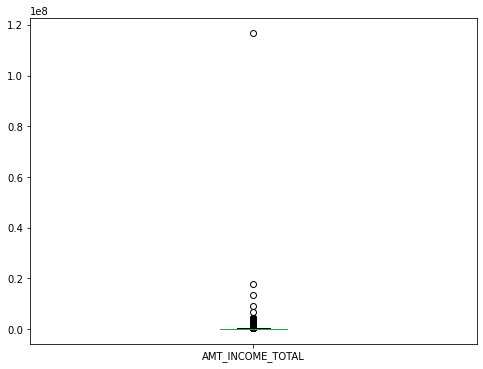

In [49]:
plt.figure(figsize = [8,6])
appl_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

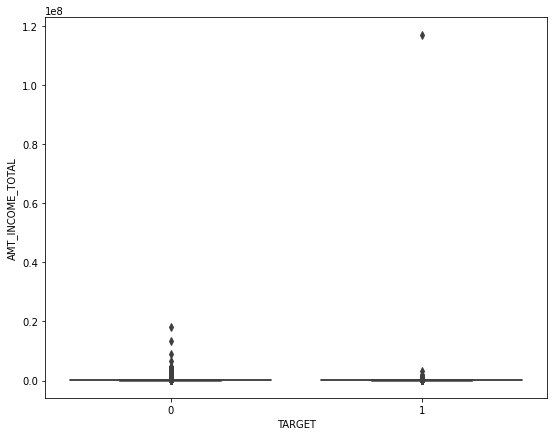

In [118]:
plt.figure(figsize = [9,7])
sns.boxplot(appl_data.TARGET , appl_data.AMT_INCOME_TOTAL)
plt.show()

 # we can infer that the outlier is a defaulter.

In [47]:
appl_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

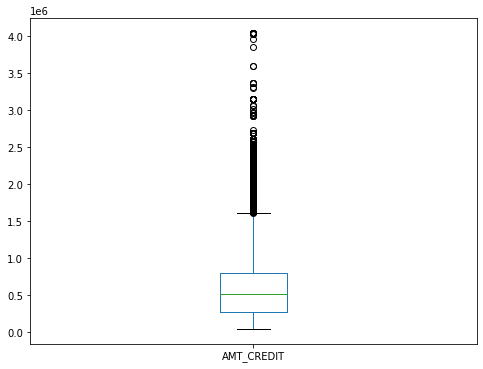

In [48]:
plt.figure(figsize = [8,6])
appl_data.AMT_CREDIT.plot.box()
plt.show()

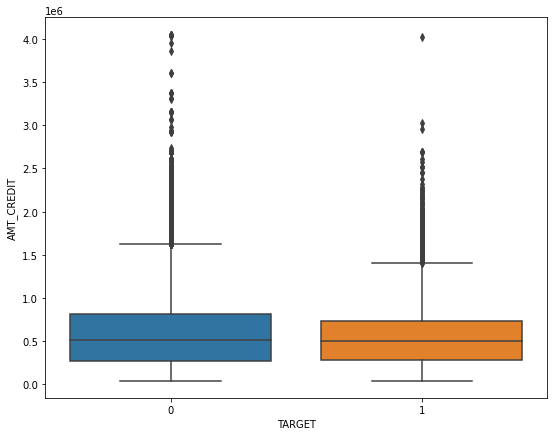

In [117]:
plt.figure(figsize = [9,7])
sns.boxplot(appl_data.TARGET , appl_data.AMT_CREDIT)
plt.show()

In [51]:
appl_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

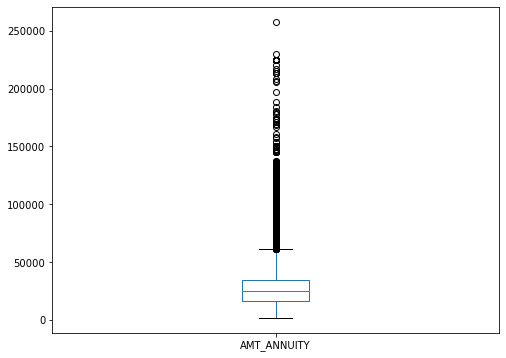

In [52]:
plt.figure(figsize = [8,6])
appl_data.AMT_ANNUITY.plot.box()
plt.show()

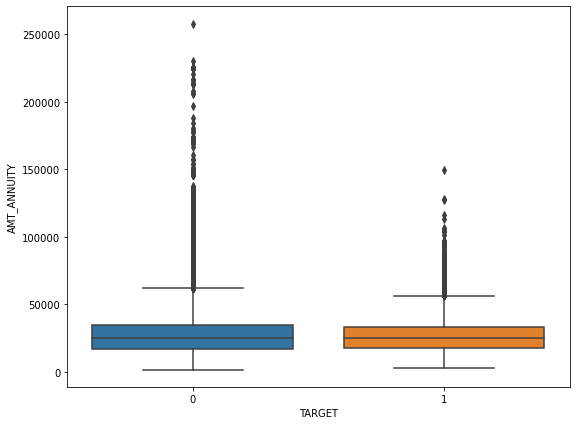

In [116]:
plt.figure(figsize = [9,7])
sns.boxplot(appl_data.TARGET , appl_data.AMT_ANNUITY)
plt.show()

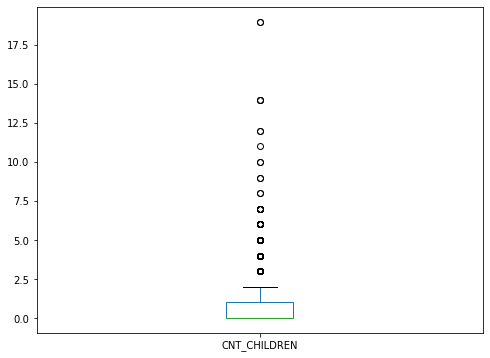

In [53]:
plt.figure(figsize = [8,6])
appl_data.CNT_CHILDREN.plot.box()
plt.show()

# it is intresting to see some applicants have 19 children and people with more children are more probable defaulters.

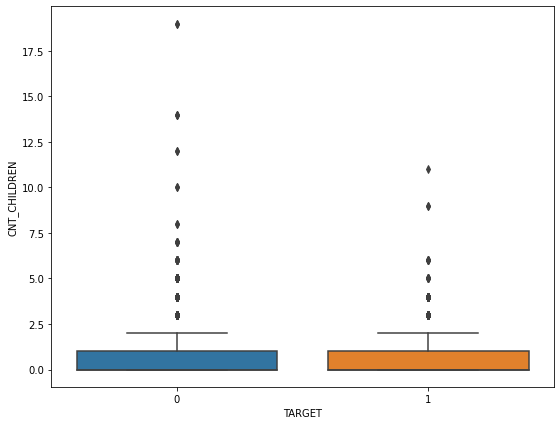

In [115]:
plt.figure(figsize = [9,7])
sns.boxplot(appl_data.TARGET , appl_data.CNT_CHILDREN)
plt.show()

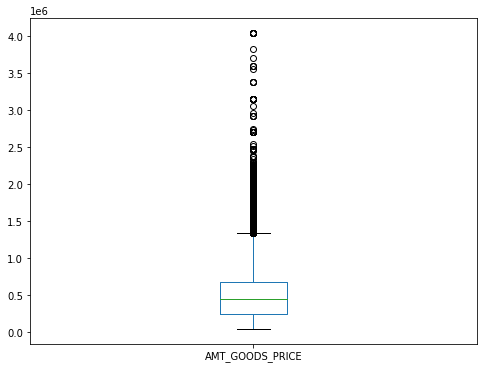

In [54]:
plt.figure(figsize = [8,6])
appl_data.AMT_GOODS_PRICE.plot.box()
plt.show()


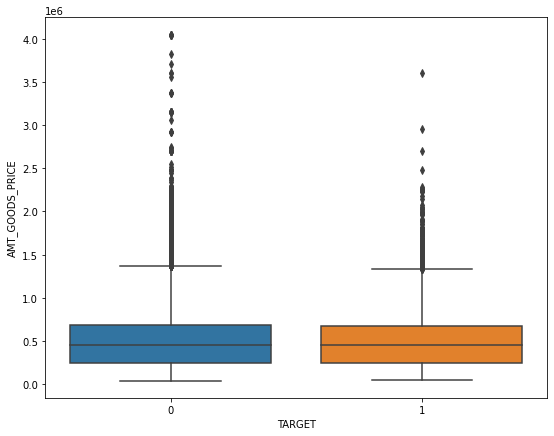

In [114]:
plt.figure(figsize = [9,7])
sns.boxplot(appl_data.TARGET , appl_data.AMT_GOODS_PRICE)
plt.show()

### Age Column Treatment: 

In [55]:
# Convert Birth Days into Years. We need to multiply the negetive birth days into positive birthdays.
# Negetive birth days means, by taking the time of registration as reference or zero age. 
# It indicate, more the -ve the birthdays is, more the Age of the applicant at the time of application. 

In [56]:
appl_data["Age"] = appl_data.DAYS_BIRTH/(-365) # Converted days to age

In [58]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219


In [59]:
appl_data.Age = appl_data.Age.round(decimals = 2)

In [60]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25.92
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45.93
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.18
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.07
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54.61


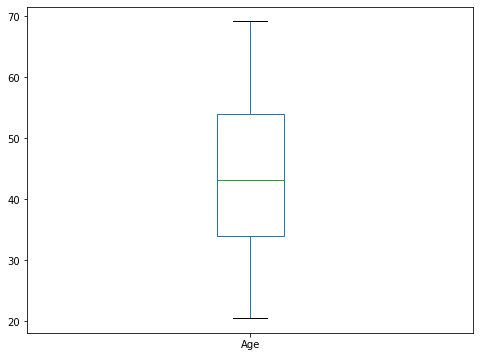

In [61]:
plt.figure(figsize = [8,6])
appl_data.Age.plot.box()
plt.show()

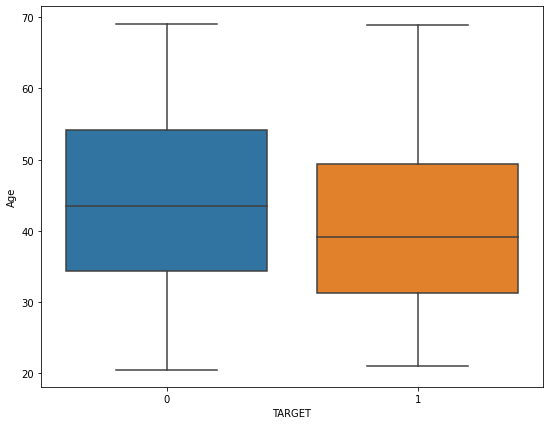

In [113]:
plt.figure(figsize = [9,7])
sns.boxplot(appl_data.TARGET , appl_data.Age)
plt.show()

In [62]:
appl_data.Age.describe()

count    307511.000000
mean         43.936976
std          11.956135
min          20.520000
25%          34.010000
50%          43.150000
75%          53.920000
max          69.120000
Name: Age, dtype: float64

In [70]:
appl_data["Age_Group"]= pd.cut(appl_data.Age , [0, 30,40, 50, 60, 9999] , labels = ["<30", "30-40" , "40-50" ,"50-60", "60+"])


In [71]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_Group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25.92,<30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45.93,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.18,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.07,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54.61,50-60


In [74]:
appl_data.Age_Group.value_counts()

30-40    82316
40-50    76526
50-60    68066
<30      45041
60+      35562
Name: Age_Group, dtype: int64

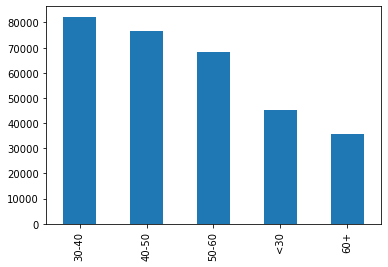

In [119]:
appl_data.Age_Group.value_counts().plot(kind='bar')

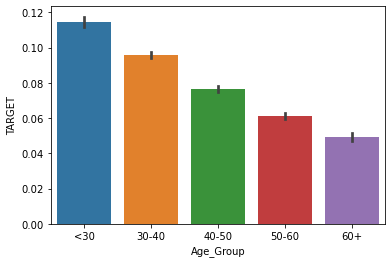

In [125]:
sns.barplot(data = appl_data, x = "Age_Group" , y = "TARGET")

In [76]:
appl_data.Age_Group.dtypes

CategoricalDtype(categories=['<30', '30-40', '40-50', '50-60', '60+'], ordered=True)

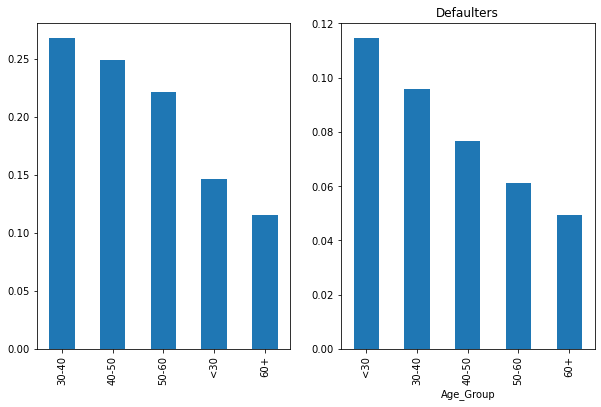

In [126]:
#plot the bar graph of Age Groups with Target mean value.
plt.figure(figsize = [10,6])
plt.subplot(1, 2 ,1)
appl_data["Age_Group"].value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title("Defaulters")
appl_data.groupby("Age_Group")["TARGET"].mean().plot.bar()
plt.show()

# the age group< 30 are the highest defaulters 

In [79]:
appl_data["Curr_Empl_Exp"] = appl_data.DAYS_EMPLOYED/(-365)

In [80]:
appl_data.Curr_Empl_Exp = appl_data.Curr_Empl_Exp.round(decimals = 2)

In [81]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_Group,Curr_Empl_Exp
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25.92,<30,1.75
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45.93,40-50,3.25
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.18,50-60,0.62
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.07,50-60,8.33
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54.61,50-60,8.32


In [83]:
appl_data.Curr_Empl_Exp.describe() 

count    307511.000000
mean       -174.836503
std         387.058528
min       -1000.670000
25%           0.790000
50%           3.320000
75%           7.560000
max          49.070000
Name: Curr_Empl_Exp, dtype: float64

**`Inference`**: All the negetive Curr_Empl_Exp values are fishy.... so we can replace them with some average age or Zero.

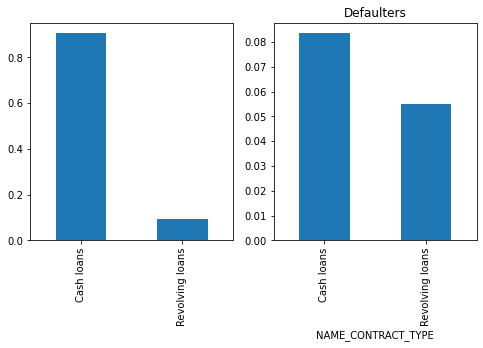

In [127]:
plt.figure(figsize = [8,4])
plt.subplot(1, 2 ,1)
appl_data.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title("Defaulters")
appl_data.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().plot.bar()
plt.show()

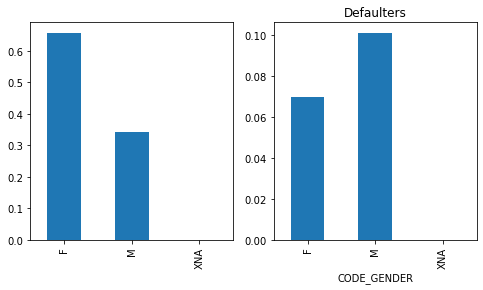

In [128]:
plt.figure(figsize = [8,4])
plt.subplot(1, 2 ,1)
appl_data.CODE_GENDER.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title("Defaulters")
appl_data.groupby("CODE_GENDER")["TARGET"].mean().plot.bar()
plt.show()

# males are more riskier and females are less.

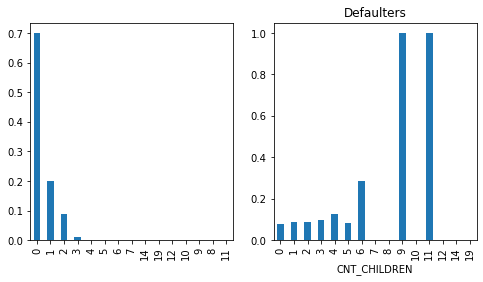

In [129]:
plt.figure(figsize = [8,4])
plt.subplot(1, 2 ,1)
appl_data.CNT_CHILDREN.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title("Defaulters")
appl_data.groupby("CNT_CHILDREN")["TARGET"].mean().plot.bar()
plt.show()

In [90]:
# Lets add a column that flags 1 for the Target Value is "Zero". So that we can get some good insights on Non- Defaulters
appl_data["Non_defaulters"] = (appl_data.TARGET *(-1))+1
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_Group,Curr_Empl_Exp,Non_defaulters
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,25.92,<30,1.75,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,45.93,40-50,3.25,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,52.18,50-60,0.62,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,52.07,50-60,8.33,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,54.61,50-60,8.32,1


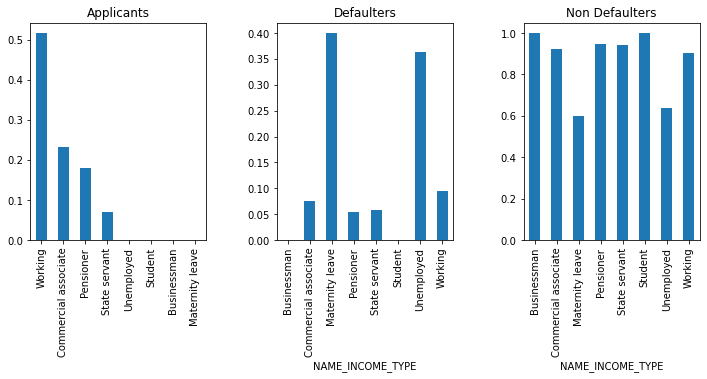

In [167]:
plt.figure(figsize = [12,4])
plt.subplot(1, 3 ,1)
plt.title("Applicants")
appl_data.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,3,2)
plt.title("Defaulters")
appl_data.groupby("NAME_INCOME_TYPE")["TARGET"].mean().plot.bar()
plt.subplot(1,3,3)
plt.title("Non Defaulters")
appl_data.groupby("NAME_INCOME_TYPE")["Non_defaulters"].mean().plot.bar()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()

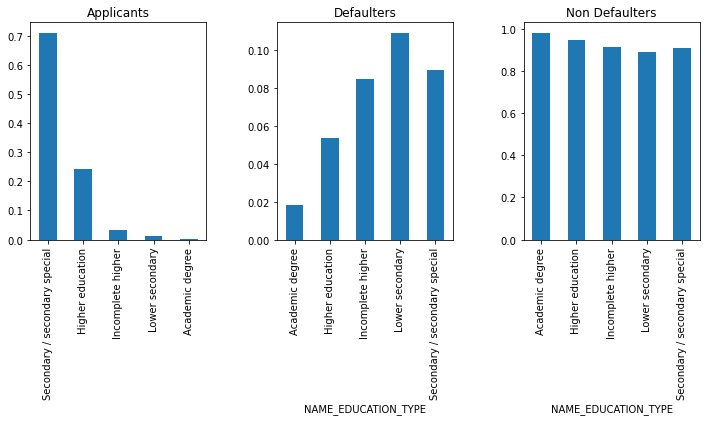

In [165]:
plt.figure(figsize = [12,4])
plt.subplot(1, 3 ,1)
plt.title("Applicants")
appl_data.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,3,2)
plt.title("Defaulters")
appl_data.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.bar()
plt.subplot(1,3,3)
plt.title("Non Defaulters")
appl_data.groupby("NAME_EDUCATION_TYPE")["Non_defaulters"].mean().plot.bar()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()

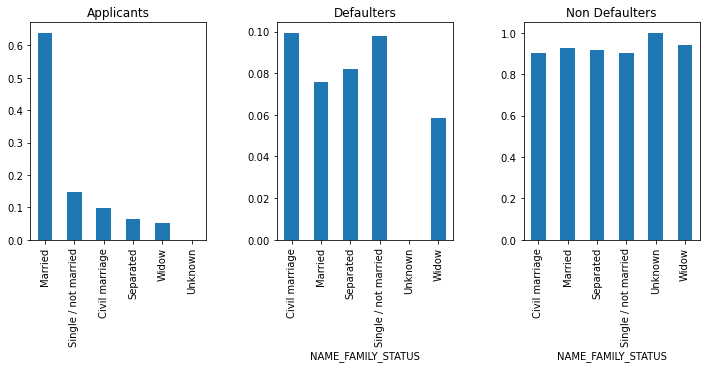

In [166]:
plt.figure(figsize = [12,4])
plt.subplot(1, 3 ,1)
plt.title("Applicants")
appl_data.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar()
plt.subplot(1,3,2)
plt.title("Defaulters")
appl_data.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().plot.bar()
plt.subplot(1,3,3)
plt.title("Non Defaulters")
appl_data.groupby("NAME_FAMILY_STATUS")["Non_defaulters"].mean().plot.bar()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()

In [157]:
res1 = pd.pivot_table(data = appl_data, index = "NAME_INCOME_TYPE" , columns = "NAME_EDUCATION_TYPE" , values = "TARGET")

In [158]:
res1

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_INCOME_TYPE,,,,,
Businessman,NaN,0.000000,NaN,NaN,NaN
Commercial associate,0.023256,0.051738,0.082059,0.121739,0.086544
Maternity leave,NaN,0.000000,NaN,NaN,1.000000
Pensioner,0.000000,0.041524,0.044402,0.066710,0.055808
State servant,0.000000,0.038813,0.067532,0.078431,0.070741
Student,NaN,0.000000,0.000000,NaN,0.000000
Unemployed,NaN,0.000000,0.333333,NaN,0.538462
Working,0.027778,0.061667,0.092569,0.145507,0.105177


In [161]:
res2 = pd.pivot_table(data = appl_data, index = "NAME_INCOME_TYPE" , columns = "NAME_FAMILY_STATUS" , values = "TARGET")
res2

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_INCOME_TYPE,,,,,,
Businessman,0.000000,0.000000,NaN,0.000000,NaN,NaN
Commercial associate,0.088376,0.069204,0.073397,0.090463,0.0,0.055046
Maternity leave,NaN,0.400000,NaN,NaN,NaN,NaN
Pensioner,0.063461,0.050906,0.060461,0.055029,NaN,0.057042
State servant,0.076131,0.054129,0.054372,0.067864,NaN,0.050143
Student,0.000000,0.000000,0.000000,0.000000,NaN,NaN
Unemployed,0.000000,0.600000,0.000000,0.200000,NaN,0.333333
Working,0.114732,0.089274,0.097534,0.116235,NaN,0.063115


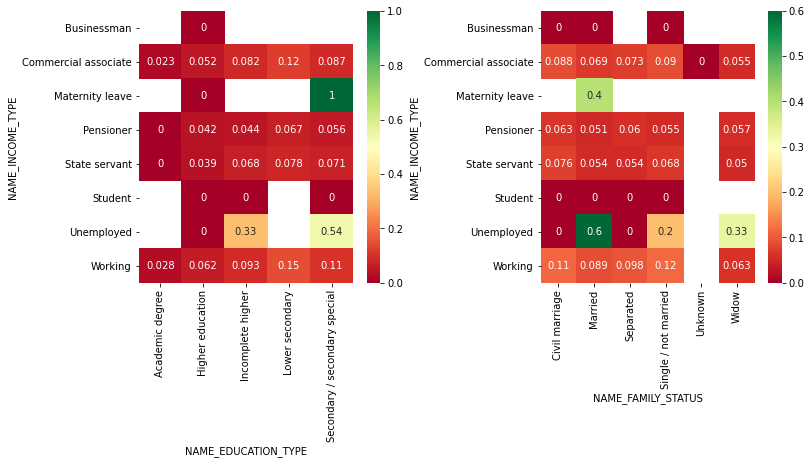

In [162]:
plt.figure(figsize = [12,5])
plt.subplot(1, 2 ,1)
sns.heatmap(res1, annot = True, cmap = "RdYlGn")
plt.subplot(1,2,2)
sns.heatmap(res2, annot = True, cmap = "RdYlGn")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.show()

In [163]:
res3 = pd.pivot_table(data = appl_data, index = "Age_Group" , columns = "NAME_EDUCATION_TYPE" , values = "TARGET")
res3

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
Age_Group,,,,,
<30,0.00,0.066932,0.096145,0.167568,0.141920
30-40,0.06,0.055972,0.085227,0.152594,0.113476
40-50,0.00,0.050437,0.073978,0.124126,0.084229
50-60,0.00,0.046808,0.054362,0.083227,0.064648
60+,0.00,0.036914,0.050794,0.062162,0.051393


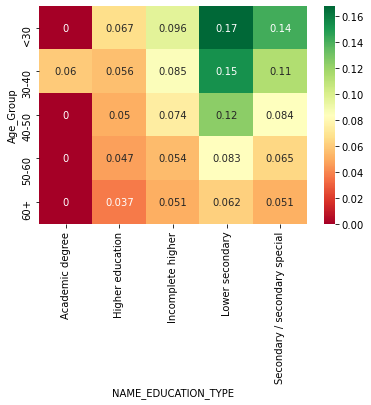

In [164]:
sns.heatmap(res3, annot = True, cmap = "RdYlGn")
plt.show()

# people in age groups <40 and with lower secondary and secondary education are more probable defaulters.

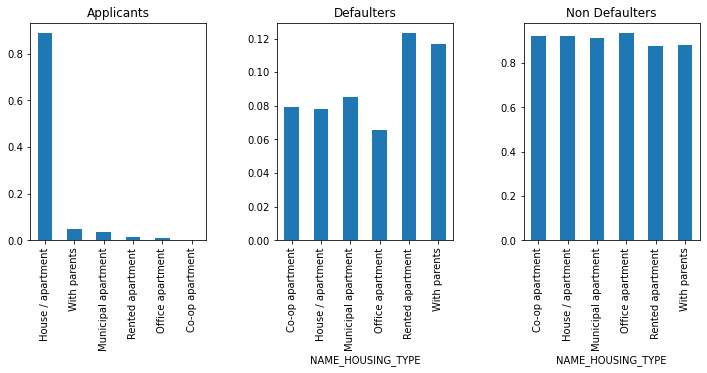

In [168]:
plt.figure(figsize = [12,4])
plt.subplot(1, 3 ,1)
plt.title("Applicants")
appl_data.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,3,2)
plt.title("Defaulters")
appl_data.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.bar()
plt.subplot(1,3,3)
plt.title("Non Defaulters")
appl_data.groupby("NAME_HOUSING_TYPE")["Non_defaulters"].mean().plot.bar()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()



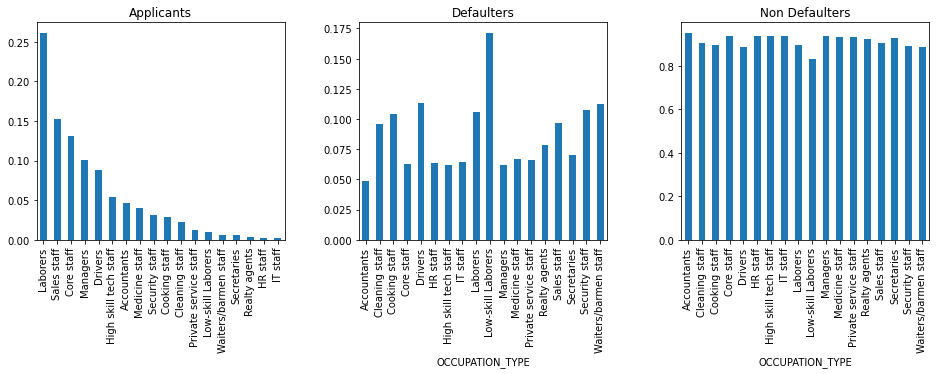

In [169]:
plt.figure(figsize = [16,4])
plt.subplot(1, 3 ,1)
plt.title("Applicants")
appl_data.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,3,2)
plt.title("Defaulters")
appl_data.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.bar()
plt.subplot(1,3,3)
plt.title("Non Defaulters")
appl_data.groupby("OCCUPATION_TYPE")["Non_defaulters"].mean().plot.bar()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.show()

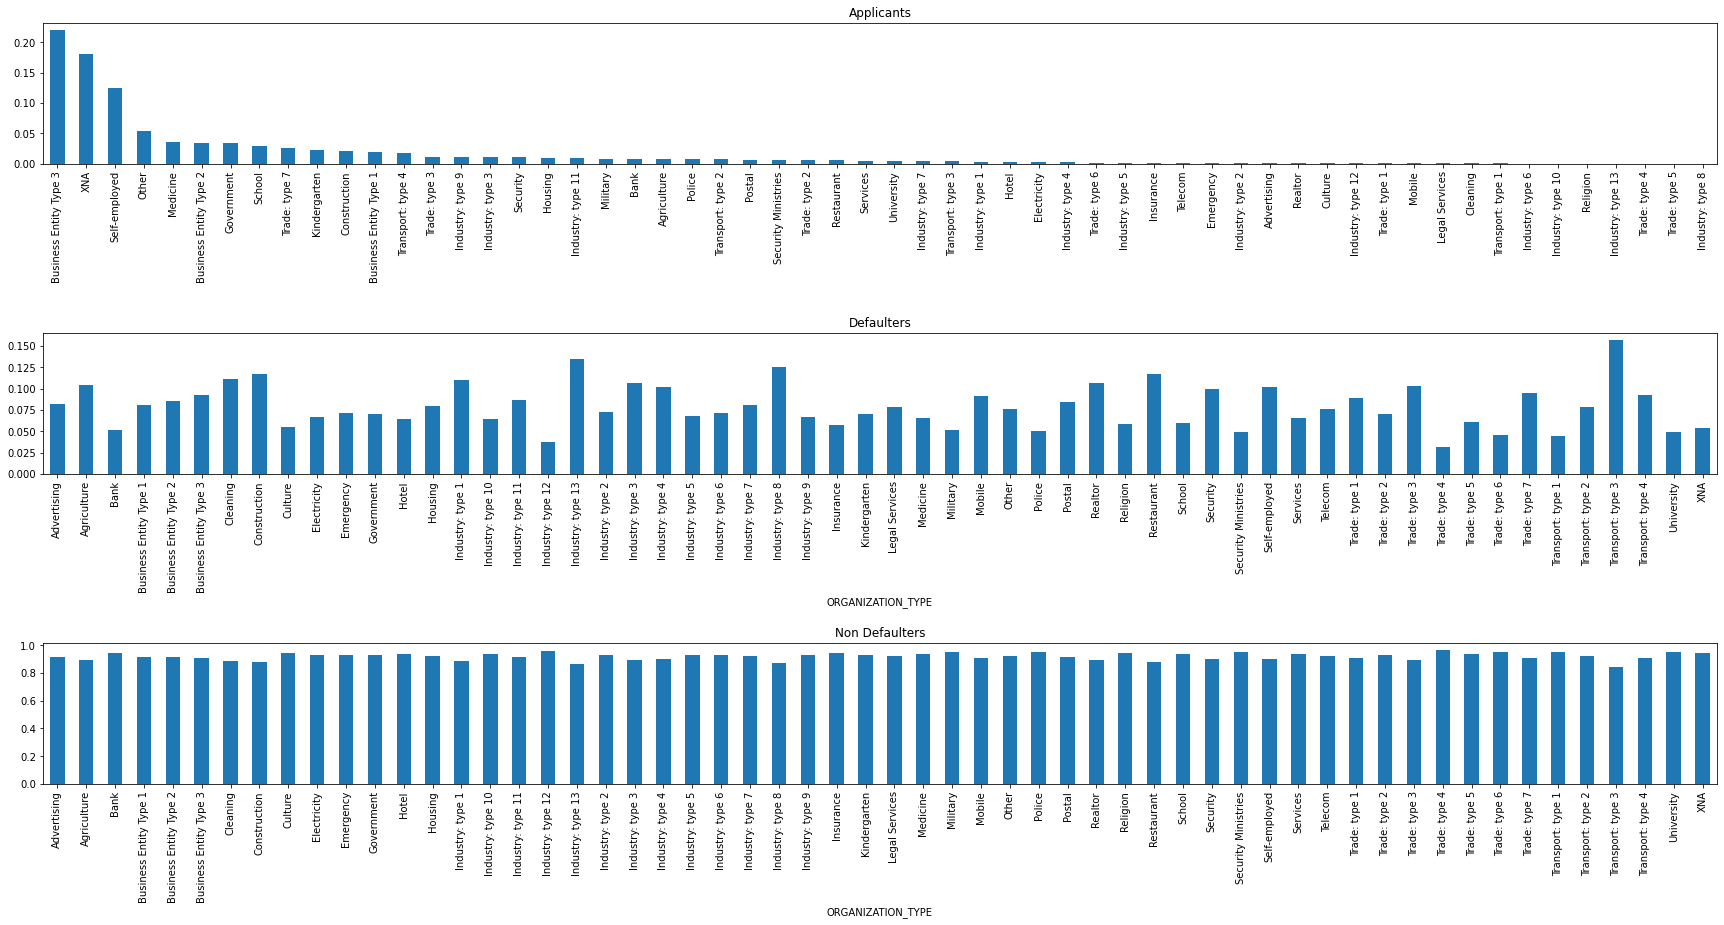

In [170]:
plt.figure(figsize = [30,14])
plt.subplot(3, 1 ,1)
plt.title("Applicants")
appl_data.ORGANIZATION_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(3,1,2)
plt.title("Defaulters")
appl_data.groupby("ORGANIZATION_TYPE")["TARGET"].mean().plot.bar()
plt.subplot(3,1,3)
plt.title("Non Defaulters")
appl_data.groupby("ORGANIZATION_TYPE")["Non_defaulters"].mean().plot.bar()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=1.2)
plt.show()

In [156]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [141]:
pre_appl_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
pre_appl_data.shape

(1670214, 37)

In [145]:
pre_appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [142]:
appl_comb = pd.merge(left=appl_data,right=pre_appl_data, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
appl_comb.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [143]:
appl_comb.shape

(1430155, 93)

In [144]:
appl_comb.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 93 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1430155 non-null  int64   
 1   TARGET                        1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1430155 non-null  object  
 3   CODE_GENDER                   1430155 non-null  object  
 4   FLAG_OWN_CAR                  1430155 non-null  object  
 5   FLAG_OWN_REALTY               1430155 non-null  object  
 6   CNT_CHILDREN                  1430155 non-null  int64   
 7   AMT_INCOME_TOTAL              1430155 non-null  float64 
 8   AMT_CREDIT_x                  1430155 non-null  float64 
 9   AMT_ANNUITY_x                 1430062 non-null  float64 
 10  AMT_GOODS_PRICE_x             1428936 non-null  float64 
 11  NAME_TYPE_SUITE_x             1426124 non-null  object  
 12  NAME_INCOME_TY

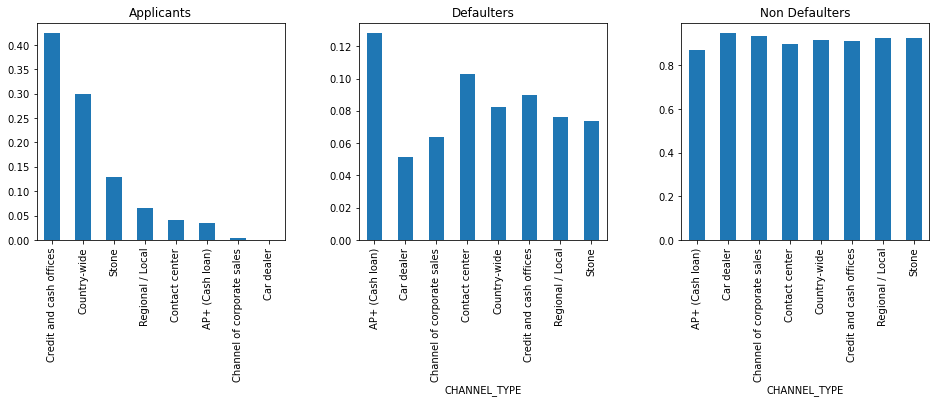

In [171]:
plt.figure(figsize = [16,4])
plt.subplot(1, 3 ,1)
plt.title("Applicants")
appl_comb.CHANNEL_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,3,2)
plt.title("Defaulters")
appl_comb.groupby("CHANNEL_TYPE")["TARGET"].mean().plot.bar()
plt.subplot(1,3,3)
plt.title("Non Defaulters")
appl_comb.groupby("CHANNEL_TYPE")["Non_defaulters"].mean().plot.bar()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.show()

# People coming through Ap+ (Cash loan) are more probable defaulters.

In [151]:
appl_comb["Days_taken2decide"] = abs(appl_comb.DAYS_DECISION)

In [152]:
appl_comb.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Days_taken2decide
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,606.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,746.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,828.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,2341.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,815.0


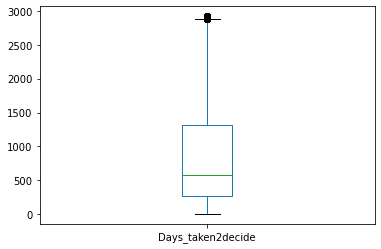

In [153]:
appl_comb["Days_taken2decide"].plot.box()

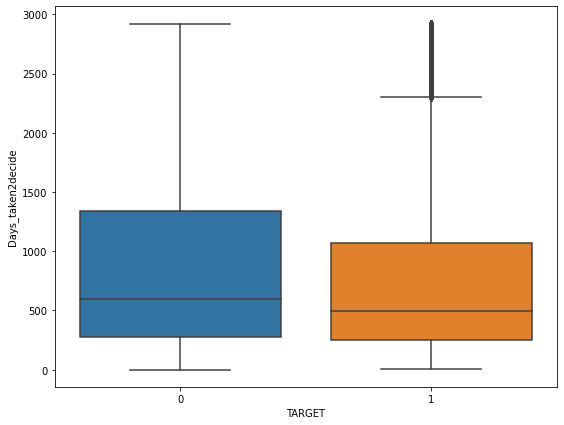

In [154]:
plt.figure(figsize = [9,7])
sns.boxplot(appl_comb.TARGET , appl_comb["Days_taken2decide"])
plt.show()